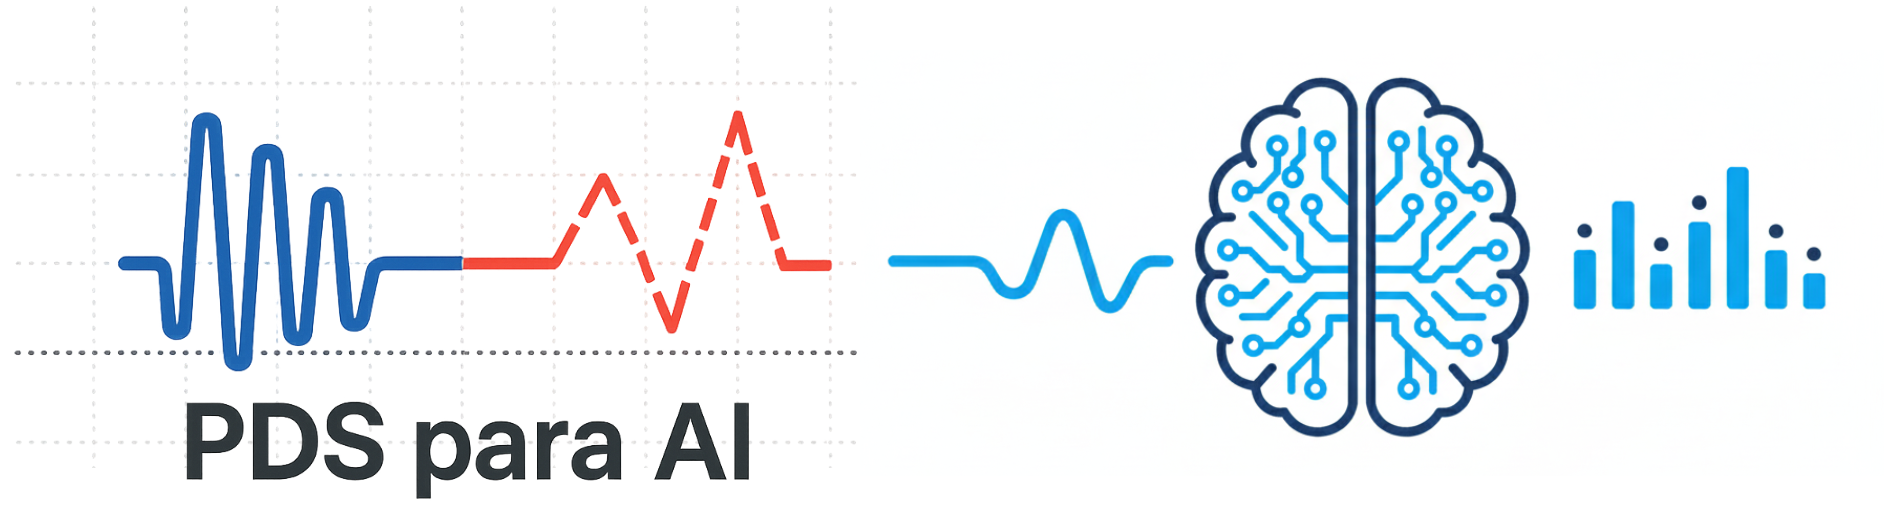

# Extração de Features usando PDS

A Extração de Features é o processo de transformar dados brutos de alta dimensão (como uma sequência de áudio ou uma imagem) em um conjunto de características numéricas (um vetor) que captura a informação essencial do sinal de forma concisa e relevante para a tarefa de ML.

### O Desafio da Dimensionalidade

Trabalhar diretamente com o sinal bruto é frequentemente ineficiente e, muitas vezes, inviável. Por exemplo, um segundo de áudio amostrado a 44.1 kHz gera 44.100 pontos de dados. Um modelo que tenta aprender a partir de 44.100 variáveis por amostra enfrenta o **"Curse of Dimensionality"** (Maldição da Dimensionalidade), resultando em:

1.  **Alto Custo Computacional:** Treinamento lento e uso excessivo de memória.
2.  **Overfitting:** O modelo aprende o ruído e as particularidades da amostra, em vez do padrão geral.

### A Solução do PDS: O Domínio da Frequência

O PDS resolve esse problema oferecendo ferramentas para migrar do **Domínio do Tempo** (onde o sinal é visto como amplitude vs. tempo) para o **Domínio da Frequência** (onde o sinal é visto como energia vs. frequência).

A **Transformada de Fourier** e suas variantes (como a Transformada Discreta de Fourier - DFT) são os pilares dessa transição. Ao analisar a frequência, podemos identificar e quantificar padrões que são invisíveis no domínio do tempo, como o tom fundamental de uma voz ou a textura de uma imagem.

> **Objetivo da Aula:** Aprender a aplicar as ferramentas do PDS, como a DFT e o Filtro de Wiener, para criar vetores de características (features) que são:
> 1.  **Discriminativos:** Maximizam a diferença entre classes (ex: distinguir um "gato" de um "cachorro").
> 2.  **Robustos:** Não são afetados por ruído ou variações irrelevantes (ex: volume do áudio).
> 3.  **Compactos:** Reduzem drasticamente a dimensionalidade do sinal original.

Nesta aula, exploraremos como técnicas consagradas, como os **Coeficientes Cepstrais de Frequência Mel (MFCCs)** para áudio e a aplicação de **Kernels de Convolução** para imagens, são, na verdade, poderosas aplicações da teoria de Processamento de Sinais. Entenderemos o *porquê* dessas técnicas funcionam, e não apenas *como* implementá-las.
```

In [ ]:
# Extração de Features no Domínio da Frequência e Tempo-Frequência (3h)
# Objetivo: Dominar as técnicas essenciais para extrair representações de alta qualidade (features) a partir de sinais, focando no domínio da frequência e tempo-frequência.

# 2.1. Feature Engineering no Domínio do Tempo (45 min)

# Estatísticas simples: Média, desvio padrão, skewness, kurtosis, picos e zero-crossing rate (ZCR).

# Análise de Envoltória e Modulação.

# 2.2. Transformações Essenciais (1h 15 min)

# Spectrogramas: Análise de Curto Prazo de Fourier (STFT) e a visualização de como a frequência muda com o tempo.

# Mel-Frequency Cepstral Coefficients (MFCCs): O padrão para reconhecimento de voz e áudio.

# Delta e Double-Delta Features (Análise de movimento/mudança).

# 2.3. Hands-on em Áudio (1h)

# Implementação de STFT e visualização de um Spectrograma.

# Cálculo de MFCCs em um trecho de áudio usando bibliotecas (librosa).

# Comparação entre features do domínio do tempo e frequência para uma tarefa de ML simples (e.g., classificação de som).

# 1 - Feature Engineering no Domínio do Tempo

A **Feature Engineering** (Engenharia de Características) no domínio do tempo é o processo de extrair informações estatísticas e descritivas de séries temporais (como sinais de áudio, sensores ou dados financeiros) para transformá-las em variáveis preditivas úteis para modelos de Machine Learning.

Nesta aula, focaremos em métricas que descrevem a distribuição, a dispersão e a dinâmica temporal do sinal.

## 1.1. Estatísticas de Tendência Central e Dispersão

Estas métricas fornecem uma visão geral da localização e da variabilidade dos dados.

### Média ($\mu$)

A média é a medida mais comum de tendência central, representando o valor esperado do sinal.

**Fórmula (para um sinal discreto $x[n]$ de $N$ amostras):**

$$\mu = \frac{1}{N} \sum_{n=1}^{N} x[n]$$

### Desvio Padrão ($\sigma$)

O desvio padrão mede a dispersão ou variabilidade dos dados em relação à média. Um valor alto indica que os pontos de dados estão espalhados por uma ampla gama de valores.

**Fórmula:**

$$\sigma = \sqrt{\frac{1}{N-1} \sum_{n=1}^{N} (x[n] - \mu)^2}$$

## 2. Estatísticas de Forma da Distribuição

Estas métricas descrevem a forma da distribuição de probabilidade do sinal, fornecendo informações sobre simetria e caudas.

### 2.1. Assimetria (Skewness)

A assimetria mede o grau de distorção e a falta de simetria em uma distribuição de dados.

*   **Skewness = 0:** Distribuição perfeitamente simétrica (ex: distribuição normal).
*   **Skewness > 0 (Positiva):** A cauda da distribuição é mais longa no lado positivo (direita).
*   **Skewness < 0 (Negativa):** A cauda da distribuição é mais longa no lado negativo (esquerda).

**Fórmula:**

$$
\text{Skewness} = \frac{1}{N} \sum_{n=1}^{N} \left( \frac{x[n] - \mu}{\sigma} \right)^3
$$

### 2.2. Curtose (Kurtosis)

A curtose mede o "peso" das caudas de uma distribuição em relação ao seu pico. Ela indica a probabilidade de valores extremos (outliers).

*   **Curtose = 3 (ou 0, dependendo da definição):** Distribuição Mesocúrtica (similar à normal).
*   **Curtose > 3 (ou > 0):** Distribuição Leptocúrtica (pico mais alto e caudas mais pesadas; mais outliers).
*   **Curtose < 3 (ou < 0):** Distribuição Platicúrtica (pico mais plano e caudas mais leves; menos outliers).

**Fórmula (Curtose Fisher, onde a curtose da normal é 0):**

$$
\text{Kurtosis} = \left[ \frac{1}{N} \sum_{n=1}^{N} \left( \frac{x[n] - \mu}{\sigma} \right)^4 \right] - 3
$$

# Feature Engineering no Domínio do Tempo




## 3. Métricas de Dinâmica Temporal

Estas métricas capturam a taxa de mudança e a estrutura de picos do sinal ao longo do tempo.

### 3.1. Picos (Peaks)

Os picos referem-se aos valores de amplitude máxima e mínima do sinal.

*   **Amplitude de Pico (Peak Amplitude):** O valor máximo absoluto do sinal.
    $$
    \text{Peak Amplitude} = \max(|x[n]|)
    $$
*   **Fator de Crista (Crest Factor):** A razão entre a amplitude de pico e o valor RMS (Root Mean Square) do sinal. É uma medida útil para identificar a presença de impulsos ou falhas em sinais de vibração.
    $$
    \text{Crest Factor} = \frac{\text{Peak Amplitude}}{\text{RMS}}
    $$
    Onde $\text{RMS} = \sqrt{\frac{1}{N} \sum_{n=1}^{N} x[n]^2}$.

### 3.2. Taxa de Cruzamento por Zero (Zero-Crossing Rate - ZCR)

O ZCR é o número de vezes que o sinal muda de sinal (de positivo para negativo ou vice-versa) em um determinado quadro de tempo. É uma característica crucial em sinais de áudio e fala, onde ajuda a distinguir entre sons vocálicos (baixo ZCR) e consoantes não-sonoras (alto ZCR).

**Fórmula:**

$$
\text{ZCR} = \frac{1}{N-1} \sum_{n=1}^{N-1} \mathbb{I} \{ x[n] x[n-1] < 0 \}
$$

onde $\mathbb{I}$ é a função indicadora, que retorna 1 se a condição dentro das chaves for verdadeira, e 0 caso contrário.

## 4. Implementação em Python (Pandas e SciPy)

A biblioteca `scipy.stats` é ideal para calcular a maioria dessas estatísticas de forma eficiente.

\`\`\`python
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 1. Geração de um sinal de exemplo (série temporal)
np.random.seed(42)
# Sinal base (ruído normal)
sinal_base = np.random.normal(loc=0, scale=1, size=1000)
# Adicionando um pico (outlier) para testar skewness/kurtosis
sinal_exemplo = np.append(sinal_base, [10, 12, 15])
N = len(sinal_exemplo)

# 2. Cálculo das Features
media = np.mean(sinal_exemplo)
desvio_padrao = np.std(sinal_exemplo, ddof=1) # ddof=1 para desvio padrão amostral

# Skewness e Kurtosis (Fisher)
skewness_val = skew(sinal_exemplo)
kurtosis_val = kurtosis(sinal_exemplo)

# Picos e RMS
peak_amplitude = np.max(np.abs(sinal_exemplo))
rms = np.sqrt(np.mean(sinal_exemplo**2))
crest_factor = peak_amplitude / rms

# Zero-Crossing Rate (ZCR)
# Conta as mudanças de sinal (x[n] * x[n-1] < 0)
zcr_val = np.sum(np.diff(np.sign(sinal_exemplo)) != 0) / (N - 1)

# 3. Apresentação dos Resultados
features = pd.DataFrame({
    'Métrica': ['Média', 'Desvio Padrão', 'Skewness', 'Kurtosis', 'Peak Amplitude', 'Crest Factor', 'ZCR'],
    'Valor': [media, desvio_padrao, skewness_val, kurtosis_val, peak_amplitude, crest_factor, zcr_val]
})

print("--- Features de Engenharia no Domínio do Tempo ---")
print(features.to_markdown(index=False, floatfmt=".4f"))
\`\`\`

## 5. Referências

*   **Estatísticas Descritivas:** Uso de momentos estatísticos (média, variância, assimetria, curtose) em análise de dados.
*   **Processamento de Sinais:** Aplicações do Zero-Crossing Rate (ZCR) em análise de fala e áudio.
*   **SciPy Documentation:** Módulo `scipy.stats` para cálculo de estatísticas.
\`\`\`


# 2 - Transformada de Fourier e a Transformada Rápida de Fourier (FFT)

A Transformada de Fourier (TF) é uma ferramenta essencial em Processamento Digital de Sinais (PDS), pois possibilita representar um sinal como a soma de seus componentes em frequência, estabelecendo a relação entre os domínios do tempo e da frequência.

## 2.1 -  A Transformada de Fourier Contínua (TFC)

A TFC é aplicada a sinais contínuos no tempo, $x(t)$, e resulta em uma função contínua no domínio da frequência, $X(f)$.

### Definição

A TFC de um sinal $x(t)$ é definida por:

$$
X(f) = \mathscr{F}\{x(t)\}
     = \int_{-\infty}^{\infty} x(t)\, e^{-j 2\pi f t}\, dt
$$

onde:
*   $x(t)$ é o sinal no domínio do tempo.
*   $X(f)$ é a representação do sinal no domínio da frequência.
*   $f$ é a frequência em Hertz (Hz).
*   $j$ é a unidade imaginária ($\sqrt{-1}$).

### Transformada Inversa de Fourier Contínua (TIFC)

A TIFC permite reconstruir o sinal original a partir de sua representação no domínio da frequência:

$$
x(t) = \mathscr{F}^{-1}\{X(f)\} = \int_{-\infty}^{\infty} X(f) e^{j 2 \pi f t} df
$$

⚠️ **Não é implementada diretamente no computador, pois:** ⚠️
- computadores lidam apenas com dados discretos
- sinais reais precisam ser amostrados


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t=np.linspace(-5,6,100)
w=np.linspace(-50,60,1000)
x=(t==0)

plt.subplot(2,2,1),plt.plot(t,x),plt.xlabel('t-->'),plt.ylabel('$\u03B4[t]$'),plt.title('Input Signal')
y1=np.zeros(len(w))

for i in range(len(t)):
	y = x[i] * np.exp(-1j * w * t[i])
	y1 = y1 + y
y2 = np.zeros(len(t))

for i in range(len(w)):
	y3 = y1[i] * np.exp(1j * w[i] * t)
	y2 = y2 + y3

plt.subplot(2,2,2),plt.plot(w,np.abs(y1),linewidth=3),plt.title('Magnitude response')
plt.xlabel('$Ω$-->'),plt.ylabel('|\u03B4(${Ω}$|')
plt.subplot(2,2,3),plt.plot(w,np.angle(y1),linewidth=3),plt.title('Phase response')
plt.xlabel('$Ω$-->'),plt.ylabel('$\phi({Ω})$')
plt.subplot(2,2,4),plt.plot(t,y2/np.max(y2)),plt.xlabel('t-->'),plt.ylabel('$\u03B4[t]$'),
plt.title('Reconstructed Signal')
plt.tight_layout()

Vamos aplicar agora a transformada de fourier naquele sinal de audio `wave.ys` definido anteiormente.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------
# Assume you already have:
# wave -> np.array (1D)
# ----------------------------------

Fs = 1000  # frequência de amostragem (Hz) — ajuste se necessário
N = len(wave.ys)
t = np.arange(N) / Fs

# ----------------------------------
# Fourier Transform
# ----------------------------------
X = np.fft.fft(wave.ys )
freqs = np.fft.fftfreq(N, d=1/Fs)

# Usar apenas frequências positivas
pos_mask = freqs >= 0

# ----------------------------------
# Plot
# ----------------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Sinal no tempo
axs[0].plot(t, wave.ys)
axs[0].set_title("Sinal no Domínio do Tempo")
axs[0].set_xlabel("Tempo (s)")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)

# Espectro de magnitude
axs[1].plot(freqs[pos_mask], np.abs(X[pos_mask]))
axs[1].set_title("Transformada de Fourier (Magnitude)")
axs[1].set_xlabel("Frequência (Hz)")
axs[1].set_ylabel("|X(f)|")
axs[1].grid(True)

plt.tight_layout()
plt.show()


## 2.2 - A Transformada Discreta de Fourier (DFT)

Para que a Transformada de Fourier possa ser processada por um computador, que lida apenas com dados discretos e finitos, é necessário utilizar a Transformada Discreta de Fourier (TDF). A TDF opera sobre uma sequência finita de $N$ amostras de um sinal.

### Definição

Dada uma sequência de $N$ amostras $x[n]$, para $n = 0, 1, \dots, N-1$, a TDF é definida como:

$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2 \pi k n}{N}}
$$

onde:
*   $x[n]$ é a $n$-ésima amostra do sinal discreto.
*   $X[k]$ é o $k$-ésimo coeficiente de frequência (bin).
*   $k$ é o índice de frequência, $k = 0, 1, \dots, N-1$.

### Transformada Inversa Discreta de Fourier (TIDF)

A TIDF permite a reconstrução da sequência original no domínio do tempo:

$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j \frac{2 \pi k n}{N}}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

# Carregar imagem RGB
img = imread("/content/zebra.png")  # shape: (H, W, 3)

# Converter para float
img = img.astype(float)

gray = (
    0.299 * img[:, :, 0] +
    0.587 * img[:, :, 1] +
    0.114 * img[:, :, 2]
)

# ----------------------------------
# 2D Fourier Transform
# ----------------------------------
F = np.fft.fftshift(np.fft.fft2(gray))
magnitude = np.log(1 + np.abs(F))

# ----------------------------------
# Plot
# ----------------------------------
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Grayscale image
axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Imagem em Tons de Cinza")
axs[0].axis("off")

# DFT magnitude
axs[1].imshow(magnitude, cmap="gray")
axs[1].set_title("DFT da Imagem (Magnitude)")
axs[1].axis("off")

plt.tight_layout()
plt.show()

## 2.3 - Transformada Rápida de Fourier (FFT)

A Transformada Rápida de Fourier (FFT) não é uma nova transformada, mas sim um **algoritmo eficiente** para calcular a Transformada Discreta de Fourier (TDF).

### Eficiência Computacional

O cálculo direto da TDF, conforme a fórmula de somatório, requer aproximadamente $O(N^2)$ operações (multiplicações e adições complexas). Para sinais longos (grande $N$), isso se torna proibitivamente lento.

O algoritmo FFT, tipicamente baseado na técnica "dividir para conquistar" (como o algoritmo de Cooley-Tukey), reduz drasticamente a complexidade computacional para $O(N \log_2 N)$.

| Algoritmo | Complexidade Computacional |
| :--- | :--- |
| TDF Direta | $O(N^2)$ |
| FFT | $O(N \log_2 N)$ |

**Exemplo:** Para $N=1024$ amostras:
*   TDF: $1024^2 \approx 1$ milhão de operações.
*   FFT: $1024 \times \log_2(1024) = 1024 \times 10 \approx 10$ mil operações.

### Implementação em Python (NumPy)

Em Python, a biblioteca `numpy.fft` fornece implementações otimizadas da FFT e sua inversa.

#### Exemplo de Geração de Sinal e Aplicação da FFT

A célula de código a seguir demonstra como gerar um sinal composto por duas senoides e aplicar a FFT para visualizar o espectro de frequência.

\`\`\`python
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sinal
Fs = 1000       # Frequência de amostragem (Hz)
T = 1.0 / Fs    # Período de amostragem
L = 1500        # Comprimento do sinal
t = np.arange(0, L) * T # Vetor de tempo

# Sinal composto por duas senoides
f1 = 50.0       # Frequência 1 (Hz)
f2 = 120.0      # Frequência 2 (Hz)
S = 0.7 * np.sin(2 * np.pi * f1 * t) + 1.0 * np.sin(2 * np.pi * f2 * t)

# 1. Aplicação da FFT
Y = np.fft.fft(S)

# 2. Cálculo do espectro de amplitude (módulo)
P2 = np.abs(Y / L)
P1 = P2[0:L//2 + 1]
P1[1:-1] = 2 * P1[1:-1]

# 3. Geração do vetor de frequência
f = Fs * np.arange(0, L//2 + 1) / L

# 4. Plotagem do resultado
plt.figure(figsize=(12, 5))
plt.plot(f, P1)
plt.title('Espectro de Amplitude (FFT)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('|P1(f)|')
plt.grid()
plt.show()
\`\`\`

### 4.2. Transformada Inversa (IFFT)

Para reconstruir o sinal original a partir do espectro de frequência, utiliza-se a Transformada Inversa Rápida de Fourier (IFFT), implementada como `numpy.fft.ifft()`.

\`\`\`python
# Reconstrução do sinal no domínio do tempo
S_reconstruido = np.fft.ifft(Y)

# O resultado da IFFT é complexo, mas a parte imaginária deve ser próxima de zero
# Plotagem do sinal original e reconstruído
plt.figure(figsize=(12, 4))
plt.plot(t[0:50], S[0:50], label='Sinal Original')
plt.plot(t[0:50], S_reconstruido.real[0:50], '--', label='Sinal Reconstruído (IFFT)')
plt.title('Comparação entre Sinal Original e Reconstruído')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()
\`\`\`

## 5. Referências

*   **Transformada de Fourier:** Conceitos fundamentais e propriedades.
*   **Algoritmo FFT:** Detalhes sobre a implementação e a redução de complexidade $O(N \log N)$.
*   **NumPy Documentation:** Documentação oficial sobre o módulo `numpy.fft`.
\`\`\`


# 2.2. Transformações Essenciais

Esta aula foca em transformações que movem o sinal do domínio do tempo para o domínio tempo-frequência ou para espaços de características mais compactos e perceptualmente relevantes, como é o caso dos MFCCs.

## 1. Spectrogramas e a Transformada de Fourier de Curto Prazo (STFT)

A Transformada de Fourier (TF) tradicional assume que o sinal é estacionário (suas propriedades estatísticas não mudam com o tempo). Para sinais não-estacionários, como a fala ou a música, é necessário analisar o espectro de frequência em pequenos intervalos de tempo.

### 1.1. Definição da STFT

A **Short-Time Fourier Transform (STFT)**, ou Transformada de Fourier de Curto Prazo, divide o sinal em pequenos segmentos (janelas) e calcula a TF para cada segmento.

**Fórmula da STFT:**

$$
X(m, k) = \sum_{n=-\infty}^{\infty} x[n] w[n-mR] e^{-j \frac{2 \pi k n}{N}}
$$

onde:
*   $x[n]$ é o sinal discreto.
*   $w[n]$ é a função de janela (ex: Hanning, Hamming).
*   $m$ é o índice do quadro (frame) de tempo.
*   $R$ é o tamanho do passo (hop size) entre os quadros.
*   $N$ é o tamanho da FFT.
*   $k$ é o índice de frequência.

### 1.2. Spectrograma

O **Spectrograma** é a visualização do módulo (magnitude) da STFT, plotado em um gráfico 2D:
*   **Eixo X:** Tempo (índice $m$).
*   **Eixo Y:** Frequência (índice $k$).
*   **Cor/Intensidade:** Magnitude da energia naquela frequência e tempo.

O Spectrograma revela como a energia do sinal se distribui pelas frequências ao longo do tempo, sendo crucial para a análise de sinais de áudio.

## 2. Mel-Frequency Cepstral Coefficients (MFCCs)

Os MFCCs são as características mais utilizadas no reconhecimento de fala e áudio. Eles são projetados para imitar a percepção auditiva humana, que é mais sensível a variações de frequência em baixas frequências do que em altas.

### 2.1. Processo de Extração

A extração de MFCCs envolve uma sequência de passos após a STFT:

1.  **Cálculo do Espectro de Potência:** Quadrado da magnitude da STFT.
2.  **Filtros Mel:** Aplicação de um banco de filtros triangulares espaçados logaritmicamente na escala Mel.
    *   **Escala Mel:** Uma escala de frequência perceptiva que se relaciona linearmente com a frequência real abaixo de 1000 Hz e logaritmicamente acima.
3.  **Logaritmo:** Aplicação do logaritmo à energia de cada filtro.
4.  **DCT (Discrete Cosine Transform):** Aplicação da Transformada Cosseno Discreta para decorrelacionar as energias dos filtros e obter os coeficientes cepstrais.

**Fórmula Conceitual (DCT final):**

$$
c_i = \sum_{k=1}^{K} (\log E_k) \cos \left[ i \left( k - \frac{1}{2} \right) \frac{\pi}{K} \right]
$$

onde:
*   $c_i$ é o $i$-ésimo MFCC.
*   $E_k$ é a energia do $k$-ésimo filtro Mel.
*   $K$ é o número de filtros Mel.

Normalmente, apenas os primeiros 12 a 20 coeficientes são mantidos, pois os coeficientes de ordem superior representam variações rápidas que não são relevantes para a característica do som.

## 3. Delta e Double-Delta Features

As características primárias (como MFCCs) descrevem o espectro em um instante de tempo. Para capturar a **dinâmica temporal** (o movimento ou a taxa de mudança do espectro), utilizamos as características Delta e Double-Delta.

### 3.1. Delta Features (Primeira Derivada)

As características Delta ($\Delta$) são uma aproximação da primeira derivada temporal das características primárias (ex: $\Delta$MFCCs). Elas representam a **velocidade** com que a característica primária está mudando.

**Fórmula de Aproximação (Diferença Finita):**

$$
\Delta c_t \approx c_t - c_{t-1}
$$

### 3.2. Double-Delta Features (Segunda Derivada)

As características Double-Delta ($\Delta\Delta$) são a segunda derivada temporal (ou a primeira derivada das características Delta). Elas representam a **aceleração** da mudança da característica primária.

**Fórmula de Aproximação:**

$$
\Delta\Delta c_t \approx \Delta c_t - \Delta c_{t-1}
$$

A inclusão de Delta e Double-Delta Features triplica o número de características (ex: 12 MFCCs + 12 $\Delta$MFCCs + 12 $\Delta\Delta$MFCCs = 36 features), mas melhora significativamente o desempenho em tarefas de reconhecimento de fala e emoção.

## 4. Implementação em Python (Librosa)

A biblioteca `librosa` é o padrão de fato em Python para análise de áudio e extração de características.

\`\`\`python
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar um sinal de áudio (usando um sinal de exemplo do librosa)
# Nota: Em um Jupyter Notebook real, você usaria librosa.load('seu_arquivo.wav')
y, sr = librosa.load(librosa.ex('libri1'), sr=16000) # sr=16000 é comum para fala

# --- 2. STFT e Spectrograma ---
# Parâmetros: n_fft (tamanho da janela), hop_length (passo)
D = librosa.stft(y, n_fft=2048, hop_length=512)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrograma (STFT)')
plt.tight_layout()
plt.show()

# --- 3. MFCCs ---
# n_mfcc=13 é um número comum de coeficientes
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time', cmap='viridis')
plt.colorbar()
plt.title('Mel-Frequency Cepstral Coefficients (MFCCs)')
plt.tight_layout()
plt.show()

# --- 4. Delta e Double-Delta Features ---
# O librosa calcula automaticamente as derivadas
mfccs_delta = librosa.feature.delta(mfccs)
mfccs_double_delta = librosa.feature.delta(mfccs, order=2)

print(f"Dimensão MFCCs (primárias): {mfccs.shape}")
print(f"Dimensão Delta MFCCs: {mfccs_delta.shape}")
print(f"Dimensão Double-Delta MFCCs: {mfccs_double_delta.shape}")

# Concatenando todas as features
all_features = np.concatenate((mfccs, mfccs_delta, mfccs_double_delta), axis=0)
print(f"Dimensão Total de Features (39 coeficientes): {all_features.shape}")
\`\`\`

## 5. Referências

*   **STFT:** Análise de sinais não-estacionários e o papel da janela de tempo.
*   **MFCCs:** O padrão de fato para reconhecimento de fala e a escala Mel.
*   **Librosa Documentation:** Guia oficial para extração de características de áudio em Python.
\`\`\`


# Referências

as referencias desta aula sao